<a href="https://colab.research.google.com/github/mchen899923/L5-Tree-Stability/blob/main/Lab5_Tree_Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

In [ ]:
#clone the assignment
!git clone "https://github.com/mchen899923/L5-Tree-Stability.git"

Cloning into 'L5-Tree-Stability'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 19 (delta 2), reused 1 (delta 1), pack-reused 14 (from 1)
Receiving objects: 100% (19/19), 804.14 KiB | 3.45 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
#import all of the neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1

In [ ]:
#read the csv file
#we picked the "Divorce Dataset"
divorce_df = pd.read_csv("L5-Tree-Stability/data/divorce/divorce_data.csv")
divorce_df.head() #show the first couple of rows so we know what we are working with

,Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce
0,2;2;4;1;0;0;0;0;0;0;1;0;1;1;0;1;0;0;0;1;0;0;0;...
1,4;4;4;4;4;0;0;4;4;4;4;3;4;0;4;4;4;4;3;2;1;1;0;...
2,2;2;2;2;1;3;2;1;1;2;3;4;2;3;3;3;3;3;3;2;1;0;1;...
3,3;2;3;2;3;3;3;3;3;3;4;3;3;4;3;3;3;3;3;4;1;1;1;...
4,2;2;1;1;1;1;0;0;0;0;0;1;0;1;1;1;1;1;2;1;1;0;0;...


In [ ]:
#split into separate columns using str.split
divorce_split= divorce_df["Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce"].str.split(";", expand=True)
divorce_split.head() #show whats happening
#this makes it easier to visualize

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [ ]:
divorce_split.isna().any().any() #check for na values
#Since we got false, we can assume that they are NO na values

np.False_

In [ ]:
divorce_split.head() #show the first few rows again just to check that there are no na values

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [ ]:
#make the column start with 1 instead of 0
divorce_split.columns = range(1, len(divorce_split.columns) + 1)
divorce_split.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [ ]:
#make the rows start with 1 instead of 0
divorce_split.index = range(1, len(divorce_split.index) + 1)
divorce_split.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
1,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
2,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
3,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
4,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
5,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


We decided to make the columns start with 1 instead of 0 because the questions are 1-55 and it does not make sense to have a "Question 0". We did the same for the rows

In [ ]:
#Check the data types
divorce_split.info()
#they are all objects!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 1 to 170
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       170 non-null    object
 1   2       170 non-null    object
 2   3       170 non-null    object
 3   4       170 non-null    object
 4   5       170 non-null    object
 5   6       170 non-null    object
 6   7       170 non-null    object
 7   8       170 non-null    object
 8   9       170 non-null    object
 9   10      170 non-null    object
 10  11      170 non-null    object
 11  12      170 non-null    object
 12  13      170 non-null    object
 13  14      170 non-null    object
 14  15      170 non-null    object
 15  16      170 non-null    object
 16  17      170 non-null    object
 17  18      170 non-null    object
 18  19      170 non-null    object
 19  20      170 non-null    object
 20  21      170 non-null    object
 21  22      170 non-null    object
 22  23      170 non-null    ob

Q1: Here, we cloned the assignment and we chose to use the Divorce Dataset. We further cleaned the data, dropping any "na" values as well as making sure the columns/rows were aligned and correct (the columns and rows started with 0 but thats not possible since the questions are 1-55). We then used ".head()" to look over the data once more and make sure that it was good to analyze!

Q2

In [ ]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#set seed
SEED = 42

# the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # all columns except the last one
y = divorce_split.iloc[:, -1]   # last column as target

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

#fit classification/regression tree
tree_model = DecisionTreeClassifier(random_state=SEED)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

#fit our linear model
linear_model = LogisticRegression(random_state=SEED, max_iter=1000)
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [ ]:
#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions))

#Save predictions for later use
predictions_dict = {
    'tree_predictions': tree_predictions,
    'linear_predictions': linear_predictions,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.88      0.94        17

    accuracy                           0.94        34
   macro avg       0.95      0.94      0.94        34
weighted avg       0.95      0.94      0.94        34

Accuracy: 0.9412

Confusion Matrix:
[[17  0]
 [ 2 15]]

Seed used: 42


Q2: We just used the train/test split and used a seed 42 here. This gave us the classification report as well as the confusion matrix. We will replicate this same process in Q3 with different seeds.

Q3

In [ ]:
#SEED 2: SEED = 123

#set seed
SEED_2 = 123

#the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  #all columns except the last one
y = divorce_split.iloc[:, -1]   #last column as target

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED_2, stratify=y
)

#fit classification/regression tree
tree_model2 = DecisionTreeClassifier(random_state=SEED_2)
tree_model2.fit(X_train, y_train)
tree_predictions2 = tree_model2.predict(X_test)

#fit our linear model
linear_model2 = LogisticRegression(random_state=SEED_2, max_iter=1000)
linear_model2.fit(X_train, y_train)
linear_predictions2 = linear_model2.predict(X_test)

In [ ]:
#SEED 2: SEED = 123

#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions2))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions2):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions2))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions2))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions2):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions2))

#save predictions for later use
predictions_dict2 = {
    'tree_predictions': tree_predictions2,
    'linear_predictions': linear_predictions2,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED_2}") #print


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

Accuracy: 1.0000

Confusion Matrix:
[[17  0]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Seed used: 123


In [ ]:
#SEED 3: SEED = 0

#set seed
SEED_3 = 0

# the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # all columns except the last one
y = divorce_split.iloc[:, -1]   # last column as target

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED_3, stratify=y
)

#fit classification/regression tree
tree_model3 = DecisionTreeClassifier(random_state=SEED_3)
tree_model3.fit(X_train, y_train)
tree_predictions3 = tree_model3.predict(X_test)

#fit our linear model
linear_model3 = LogisticRegression(random_state=SEED_3, max_iter=1000)
linear_model3.fit(X_train, y_train)
linear_predictions3 = linear_model3.predict(X_test)

In [ ]:
#SEED 3: SEED = 0

#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions3))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions3):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions3))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions3))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions3):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions3))

#save predictions for later use
predictions_dict3 = {
    'tree_predictions': tree_predictions3,
    'linear_predictions': linear_predictions3,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED_3}") #print


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Seed used: 0


In [ ]:
#SEED 4: SEED = 1234

#set seed
SEED_4 = 1234

#the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # all columns except the last one
y = divorce_split.iloc[:, -1]   # last column as target

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED_4, stratify=y
)

#fit classification/regression tree
tree_model4 = DecisionTreeClassifier(random_state=SEED_4)
tree_model4.fit(X_train, y_train)
tree_predictions4 = tree_model4.predict(X_test)

#fit our linear model
linear_model4 = LogisticRegression(random_state=SEED_4, max_iter=1000)
linear_model4.fit(X_train, y_train)
linear_predictions4 = linear_model4.predict(X_test)

In [ ]:
#SEED 4: SEED = 1234

#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions4))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions4):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions4))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions4))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions4):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions4))

#save predictions for later use
predictions_dict4 = {
    'tree_predictions': tree_predictions4,
    'linear_predictions': linear_predictions4,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED_4}") #print


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Seed used: 1234


In [ ]:
#SEED 5: SEED = 7

#set seed
SEED_5 = 7

#the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # all columns except the last one
y = divorce_split.iloc[:, -1]   # last column as target

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED_5, stratify=y
)

#fit classification/regression tree
tree_model5 = DecisionTreeClassifier(random_state=SEED_5)
tree_model5.fit(X_train, y_train)
tree_predictions5 = tree_model5.predict(X_test)

#fit our linear model
linear_model5 = LogisticRegression(random_state=SEED_5, max_iter=1000)
linear_model5.fit(X_train, y_train)
linear_predictions5 = linear_model5.predict(X_test)

In [ ]:
#SEED 5: SEED = 7

#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions5))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions5):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions5))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions5))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions5):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions5))

#save predictions for later use
predictions_dict5 = {
    'tree_predictions': tree_predictions5,
    'linear_predictions': linear_predictions5,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED_5}") #print


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.94      1.00      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[16  1]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Seed used: 7


We used 4 different seeds and generated the confusion matrix and classification report.

In [ ]:
#Plot all of the trees to compare

#import packages
from sklearn.tree import plot_tree

#save seeds to seeds_to_plot for for loop
seeds_to_plot = [42, 123, 0, 1234, 7]


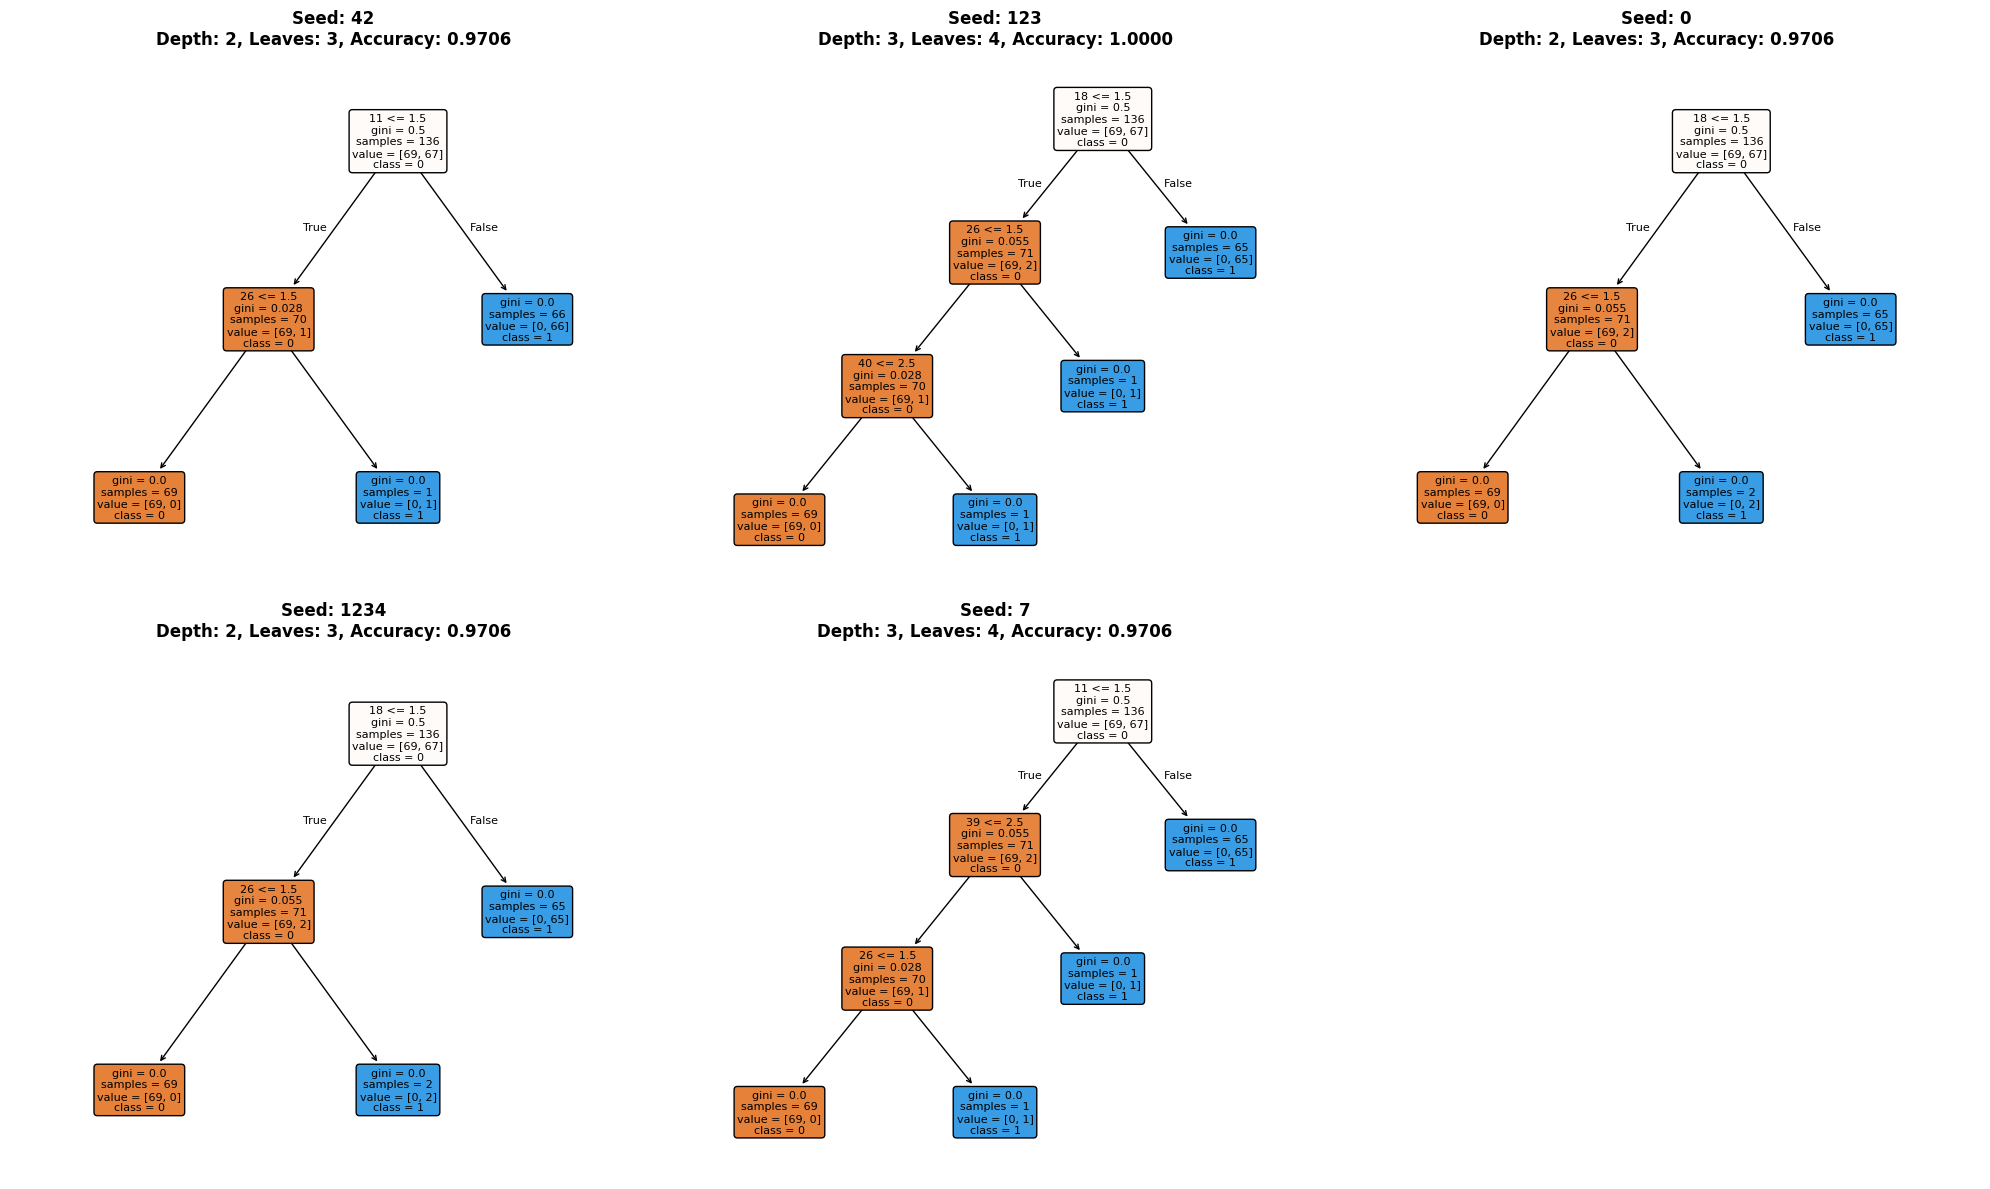

In [ ]:
#Plot the trees
fig, axes = plt.subplots(2, 3, figsize=(20, 12)) #create subplots for easy visual comparison
axes = axes.ravel() #flatten axes array to make it easier to work with

#for loop to plot each seed value
for idx, seed in enumerate(seeds_to_plot):
    #train-test split with seeds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    #fit Classification Tree
    tree_model = DecisionTreeClassifier(random_state=seed)
    tree_model.fit(X_train, y_train)

    #calculate accuracy
    tree_preds = tree_model.predict(X_test)
    tree_acc = accuracy_score(y_test, tree_preds)

    #plot tree
    plot_tree(tree_model,
              ax=axes[idx],
              feature_names=X.columns if hasattr(X, 'columns') else None,
              class_names=['0', '1'],
              filled=True,
              rounded=True,
              fontsize=8)

    #title for plots
    axes[idx].set_title(f'Seed: {seed}\nDepth: {tree_model.get_depth()}, '
                        f'Leaves: {tree_model.get_n_leaves()}, '
                        f'Accuracy: {tree_acc:.4f}',
                        fontsize=12, fontweight='bold')

#remove the extra subplot
axes[-1].axis('off')

#plot the trees
plt.tight_layout()
plt.savefig('decision_trees_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#print statistics for each seed
print("Tree Comparisons")
#for loop to find statistics for each seed value
for seed in seeds_to_plot:
    #train test split for each seed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    tree_model = DecisionTreeClassifier(random_state=seed)
    tree_model.fit(X_train, y_train)
    # predict and calculate accuracy
    tree_preds = tree_model.predict(X_test)
    tree_acc = accuracy_score(y_test, tree_preds)

    #print out depth, leaves, accuracy for each tree for comparison
    print(f"\nSeed {seed}:")
    print(f"  Depth: {tree_model.get_depth()}")
    print(f"  Leaves: {tree_model.get_n_leaves()}")
    print(f"  Accuracy: {tree_acc:.4f}")
    #look at top features to see which questions are the most important predictors in each model for comparison
    print(f"  Top 3 Important Features:")
    if hasattr(X, 'columns'):
        importances = pd.DataFrame({
            'feature': X.columns,
            'importance': tree_model.feature_importances_
        }).sort_values('importance', ascending=False)
        for i, row in importances.head(3).iterrows():
            print(f"    {row['feature']}: {row['importance']:.4f}") #print everything out

Tree Comparisons

Seed 42:
  Depth: 2
  Leaves: 3
  Accuracy: 0.9706
  Top 3 Important Features:
    11.0: 0.9710
    26.0: 0.0290
    3.0: 0.0000

Seed 123:
  Depth: 3
  Leaves: 4
  Accuracy: 1.0000
  Top 3 Important Features:
    18.0: 0.9428
    40.0: 0.0290
    26.0: 0.0282

Seed 0:
  Depth: 2
  Leaves: 3
  Accuracy: 0.9706
  Top 3 Important Features:
    18.0: 0.9428
    26.0: 0.0572
    3.0: 0.0000

Seed 1234:
  Depth: 2
  Leaves: 3
  Accuracy: 0.9706
  Top 3 Important Features:
    18.0: 0.9428
    26.0: 0.0572
    3.0: 0.0000

Seed 7:
  Depth: 3
  Leaves: 4
  Accuracy: 0.9706
  Top 3 Important Features:
    11.0: 0.9428
    26.0: 0.0290
    39.0: 0.0282


Varying the seed changes which features go into which split. Therefore, this affects how the model decides which divorce question is the best predictor of whether a couple is actually divorced or not. This affects the results and also determines the shape of the tree. Overall the trees, the results are fairly similar; certain features remain the same throughout the trees, such as question 26 consistently being a top predictor on whether a couple is divorced or not. However, there are other features that differ for each tree. Additionally, while accuracy is the same for four of the trees, for Seed 123, the accuracy is a perfect 1 which may indicate overfitting.

In [ ]:
#create a DataFrame to easily compare coefficients across seeds
seeds_to_analyze = [42, 123, 0, 1234, 7]
coef_comparison = pd.DataFrame()

#for loop to analyze linear coefficient for each seed
for seed in seeds_to_analyze:
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    #fit Linear Model
    linear_model = LogisticRegression(random_state=seed, max_iter=1000)
    linear_model.fit(X_train, y_train)

    #add coefficients as a column for easy visualization
    coef_comparison[f'Seed_{seed}'] = linear_model.coef_[0]

#set feature names as index if available, tie coefficients back to original features
if hasattr(X, 'columns'):
    coef_comparison.index = X.columns

print(coef_comparison)

     Seed_42  Seed_123    Seed_0  Seed_1234    Seed_7
1   0.021953  0.320188  0.190255   0.199273  0.097149
2   0.014039  0.386478  0.199878   0.229283  0.105919
3   0.091288  0.338051  0.100242   0.147922  0.377038
4   0.092655  0.100480  0.126174   0.110600  0.095521
5   0.061899  0.156317  0.196435   0.176609  0.032836
6   0.344884  0.109923  0.412487   0.358255  0.277289
7   0.009755  0.014558 -0.000600  -0.001228 -0.000719
8   0.172917  0.013071  0.093545   0.110933  0.120852
9   0.210975  0.017702  0.121615   0.136620  0.145751
10  0.222234 -0.124329  0.027924   0.013586  0.051981
11  0.272493  0.088264  0.076687   0.106375  0.265813
12  0.159459  0.029221  0.183669   0.207873  0.081513
13 -0.047244 -0.017831 -0.162020  -0.159256 -0.003904
14  0.138910  0.224234  0.192404   0.178821  0.172914
15  0.274763  0.118513  0.345351   0.326284  0.219132
16 -0.057594  0.288635  0.061396   0.079101  0.046468
17  0.313662  0.133081  0.383739   0.401439  0.260474
18  0.304911  0.156618  0.35

The linear coefficient comparison across different train-test splits reveals important insights about model stability and feature reliability. Features with large standard deviations, such as questions 40, 44, and 3, demonstrate high variation in their coefficients depending on which observations are included in the training set, indicating they are unstable predictors. More concerning are questions like 7, 10, 13, 22, 23, 24, 45, 48, 51, and 54, whose coefficients change sign across different seeds, meaning the model cannot consistently determine whether these features predict divorce or non-divorce. In contrast, features with small standard deviations represent robust predictors that the model consistently relies on regardless of the train-test split. Overall, the substantial variation in coefficients across seeds suggests the linear model is sensitive to the specific composition of the training data, which may indicate potential overfitting or that certain features lack reliable predictive power for the divorce outcome.

Q4A

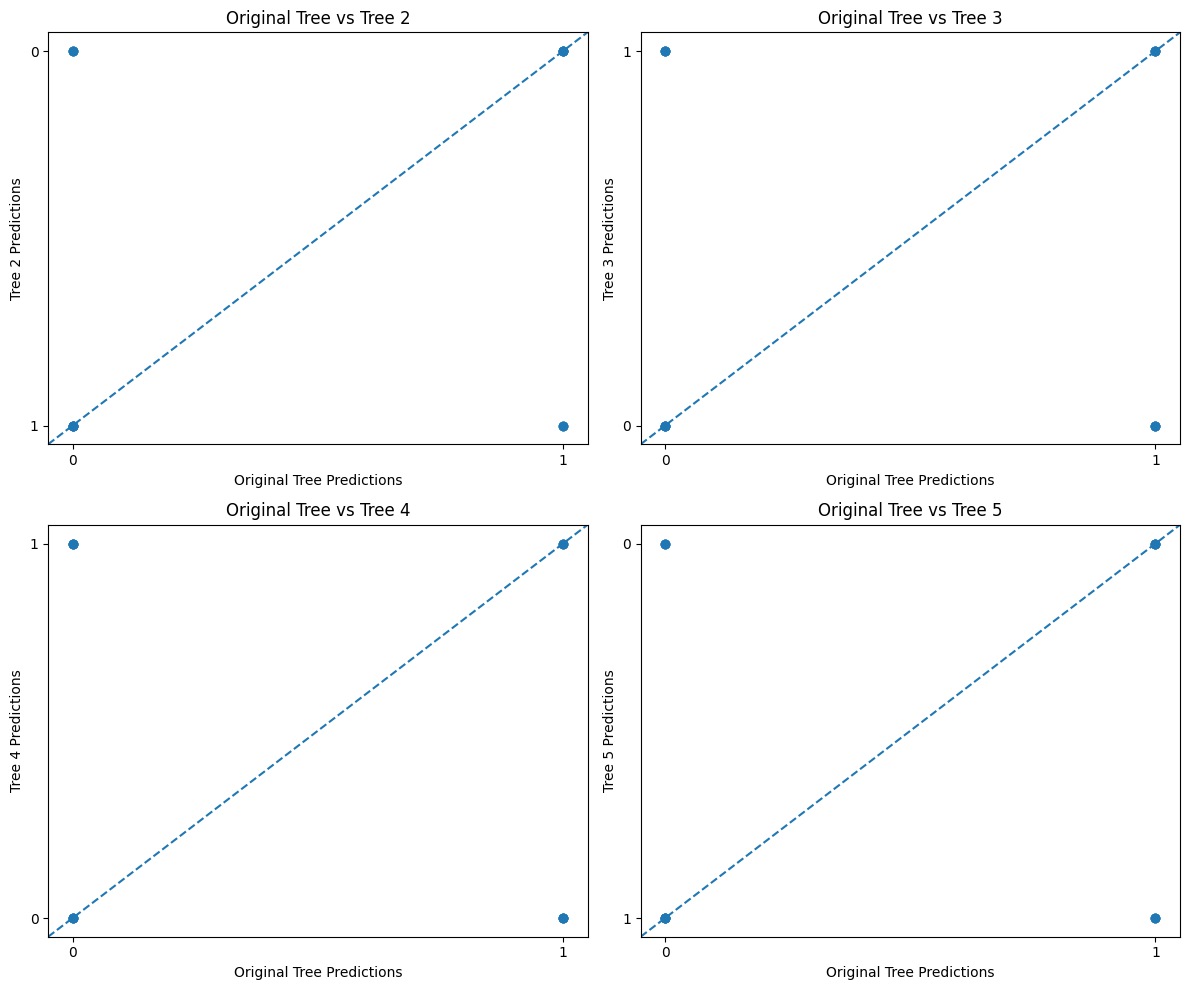

In [ ]:
#save predictions under tree_preds
tree_preds = [tree_predictions2, tree_predictions3, tree_predictions4, tree_predictions5]
#save names under label for axis label/ differentiate btw different trees
labels = ["Tree 2", "Tree 3", "Tree 4", "Tree 5"]

plt.figure(figsize=(12, 10))

#for loop to plot predictions in scatterplot
for i, alt_pred in enumerate(tree_preds):
    plt.subplot(2, 2, i+1)
    plt.scatter(tree_predictions, alt_pred, alpha=0.6)
    plt.xlabel("Original Tree Predictions")
    plt.ylabel(f"{labels[i]} Predictions")
    plt.title(f"Original Tree vs {labels[i]}")
    plt.axline((0,0), slope=1, linestyle="--") # reference line

plt.tight_layout()
plt.show()

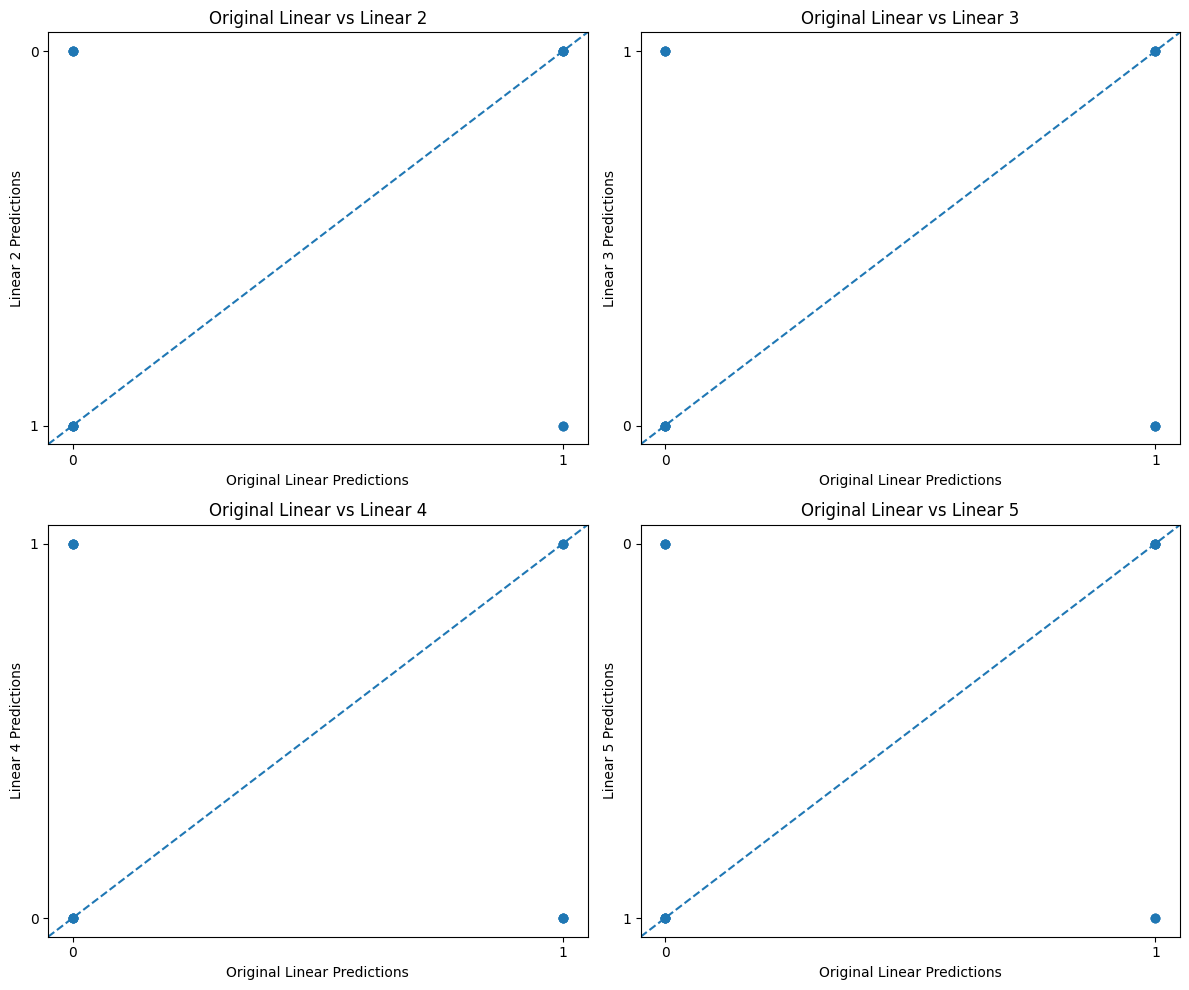

In [ ]:
#linear predictions
lin_preds = [linear_predictions2, linear_predictions3, linear_predictions4, linear_predictions5]
labels = ["Linear 2", "Linear 3", "Linear 4", "Linear 5"]

#figure size
plt.figure(figsize=(12, 10))

#plot the figure + make it pretty
for i, alt_pred in enumerate(lin_preds):
    plt.subplot(2, 2, i+1)
    plt.scatter(linear_predictions, alt_pred, alpha=0.6)
    plt.xlabel("Original Linear Predictions")
    plt.ylabel(f"{labels[i]} Predictions")
    plt.title(f"Original Linear vs {labels[i]}")
    plt.axline((0,0), slope=1, linestyle="--")

#show the plot
plt.tight_layout()
plt.show()

Q4A:

**Tree Models:** The scatterplots show points that generally align well along the diagonal reference line, indicating a strong correlation between the original tree model (seed 42) and the alternative tree models. The points cluster tightly around the diagonal, suggesting the tree models make very consistent predictions across different train/test splits.

**Linear Models:** The linear model scatterplots also show an alignment along the diagonal, though there appears to be slightly more scatter compared to the tree models. The points still follow the general diagonal pattern, but with somewhat more deviation.

Q4B

In [45]:
#Tree predictions

#assuming SEED_BASE and tree_preds are available from previous cells
SEED_BASE = 42
seeds = [42, 123, 0, 1234, 7]

#Get the base tree predictions (from SEED_BASE) made on X_test_base
base_tree_predictions_int = tree_preds[SEED_BASE].astype(int)

print("\nTree Prediction Correlations:")
#For each seed in seeds (excluding SEED_BASE)
for seed in seeds:
    if seed == SEED_BASE:
        continue

    #Convert the predictions to integer type
    alt_tree_predictions_int = tree_preds[seed].astype(int)

    #Calculate the Pearson correlation coefficient
    correlation = np.corrcoef(base_tree_predictions_int, alt_tree_predictions_int)[0, 1]

    #Print the correlation coefficient
    print(f"  Correlation between Original Tree (Seed {SEED_BASE}) and Tree (Seed {seed}): {correlation:.4f}")


Tree Prediction Correlations:
  Correlation between Original Tree (Seed 42) and Tree (Seed 123): 0.9428
  Correlation between Original Tree (Seed 42) and Tree (Seed 0): 1.0000
  Correlation between Original Tree (Seed 42) and Tree (Seed 1234): 1.0000
  Correlation between Original Tree (Seed 42) and Tree (Seed 7): 0.9428


In [ ]:
#Linear model predictions

#Assuming SEED_BASE and lm_preds are available from previous cells
SEED_BASE = 42
seeds = [42, 123, 0, 1234, 7]

#Get the base linear predictions (from SEED_BASE) made on X_test_base
base_linear_predictions_int = lm_preds[SEED_BASE].astype(int)

print("\nLinear Model Prediction Correlations:")
#For each seed in seeds (excluding SEED_BASE)
for seed in seeds:
    if seed == SEED_BASE:
        continue

    #Convert the predictions to integer type
    alt_linear_predictions_int = lm_preds[seed].astype(int)

    #Calculate the Pearson correlation coefficient
    correlation = np.corrcoef(base_linear_predictions_int, alt_linear_predictions_int)[0, 1]

    #Print the correlation coefficient
    print(f"  Correlation between Original Linear (Seed {SEED_BASE}) and Linear (Seed {seed}): {correlation:.4f}")


Linear Model Prediction Correlations:
  Correlation between Original Linear (Seed 42) and Linear (Seed 123): 0.8885
  Correlation between Original Linear (Seed 42) and Linear (Seed 0): 0.9424
  Correlation between Original Linear (Seed 42) and Linear (Seed 1234): 0.9424
  Correlation between Original Linear (Seed 42) and Linear (Seed 7): 0.9424


Q4B: The tree predictions and the linear model predictions are all highly correlated. We would say that the tree predictions are more correlated to each other and greater than R = 0.94. This suggests that the model is stable and not sensitive to noise which captures consistent trends in the data.

Q4C

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression


#set the 'SEED_BASE' as 42
SEED_BASE = 42
seeds_to_plot_against_base = [s for s in seeds if s != SEED_BASE]

#Linear regression (correlation, intercept, slope) for tree predictions
print("Linear Regression of Tree Predictions")
for seed in seeds_to_plot_against_base:
    #Reshape predictions to be 2D for LinearRegression
    X_reg = tree_preds[SEED_BASE].astype(int).reshape(-1, 1)
    y_reg = tree_preds[seed].astype(int)

    #calculations
    reg = LinearRegression().fit(X_reg, y_reg)
    r_squared = reg.score(X_reg, y_reg)

    #print out all of the information
    print(f"\nTree Regression: Base (Seed {SEED_BASE}) vs Alt (Seed {seed})")
    print(f"  Intercept: {reg.intercept_:.4f}")
    print(f"  Slope: {reg.coef_[0]:.4f}")
    print(f"  R^2: {r_squared:.4f}")

#Linear regression (correlation, intercept, slope) for linear model predictions
print("Linear Regression of Linear Model Predictions")
for seed in seeds_to_plot_against_base:
    # Reshape predictions to be 2D for LinearRegression
    X_reg = lm_preds[SEED_BASE].astype(int).reshape(-1, 1)
    y_reg = lm_preds[seed].astype(int)

    #calculations
    reg = LinearRegression().fit(X_reg, y_reg)
    r_squared = reg.score(X_reg, y_reg)

    #print everything out
    print(f"\nLinear Model Regression: Base (Seed {SEED_BASE}) vs Alt (Seed {seed})")
    print(f"  Intercept: {reg.intercept_:.4f}")
    print(f"  Slope: {reg.coef_[0]:.4f}")
    print(f"  R^2: {r_squared:.4f}")


Linear Regression of Tree Predictions

Tree Regression: Base (Seed 42) vs Alt (Seed 123)
  Intercept: 0.0556
  Slope: 0.9444
  R^2: 0.8889

Tree Regression: Base (Seed 42) vs Alt (Seed 0)
  Intercept: 0.0000
  Slope: 1.0000
  R^2: 1.0000

Tree Regression: Base (Seed 42) vs Alt (Seed 1234)
  Intercept: 0.0000
  Slope: 1.0000
  R^2: 1.0000

Tree Regression: Base (Seed 42) vs Alt (Seed 7)
  Intercept: 0.0556
  Slope: 0.9444
  R^2: 0.8889
Linear Regression of Linear Model Predictions

Linear Model Regression: Base (Seed 42) vs Alt (Seed 123)
  Intercept: 0.1053
  Slope: 0.8947
  R^2: 0.7895

Linear Model Regression: Base (Seed 42) vs Alt (Seed 0)
  Intercept: 0.0526
  Slope: 0.9474
  R^2: 0.8882

Linear Model Regression: Base (Seed 42) vs Alt (Seed 1234)
  Intercept: 0.0526
  Slope: 0.9474
  R^2: 0.8882

Linear Model Regression: Base (Seed 42) vs Alt (Seed 7)
  Intercept: 0.0526
  Slope: 0.9474
  R^2: 0.8882


Q4C: The regression analysis of predicted values reveals strong agreement between the base models (seed 42) and the alternative models across different random splits. For tree models, the intercepts are nearly zero, and the slopes are very close to 1, and R² values are extremely high (0.8889-1.0000), indicating near-perfect correspondence between predictions. Linear models show similarly strong but slightly weaker patterns, with small intercepts, slopes close to 1, and high R² values (0.7895-0.8882). These results demonstrate that despite using different train/test splits, the models produce highly correlated predictions on their respective test sets, suggesting the models are capturing consistent underlying patterns in the data. The tree models appear slightly more stable than the linear models, because they have higher R² values and slopes closer to 1.

Q5:

**Linear Models:** The linear models show high similarity in both coefficients and predictions across train/test splits. The regression analysis revealed R^2 values of 0.79-0.88, slopes of 0.89-0.95 (close to 1), and near-zero intercepts. The scatterplots show points generally aligned along the diagonal, indicating consistent predictions. This suggests that linear models are learning similar coefficient patterns regardless of the specific train/test split, which is expected given their lower flexibility.

**Tree Models:** The tree models show even higher similarity in predictions across splits, with R^2  values of 0.89-1.00, slopes of 0.94-1.00 (very close to 1), and intercepts near zero. The scatterplots show tighter clustering around the diagonal compared to linear models. While tree predictions are highly consistent, the underlying tree structures themselves may differ considerably.

In summary, both model types show strong stability in predictions across different random splits, with trees demonstrating slightly better prediction consistency than linear models.

Q6: **TRUE**: Decision trees have high variation as models, which means that a small change in the training set of data or a random seed can cause the appearance of the tree to look quite different. For example, the trees can differ in the number of splits, the depth, and the number of branches they might have. However, despite any differences in appearance or instability in their structural differences, they might still end up making relatively similar predictions. This is because despite any differences in the shape of the tree, all of them still seem to separate or partition data in a similar manner. This leads to pretty consistent predictive performances throughout all the trees.